In [1]:
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

Создадим распределение Хи-квадрат

In [3]:
k = 2 # степени свободы
distribution = st.chi2(k)
sample = distribution.rvs(1000)

Отрисуем выборку из 1000 элементов из данного распределения

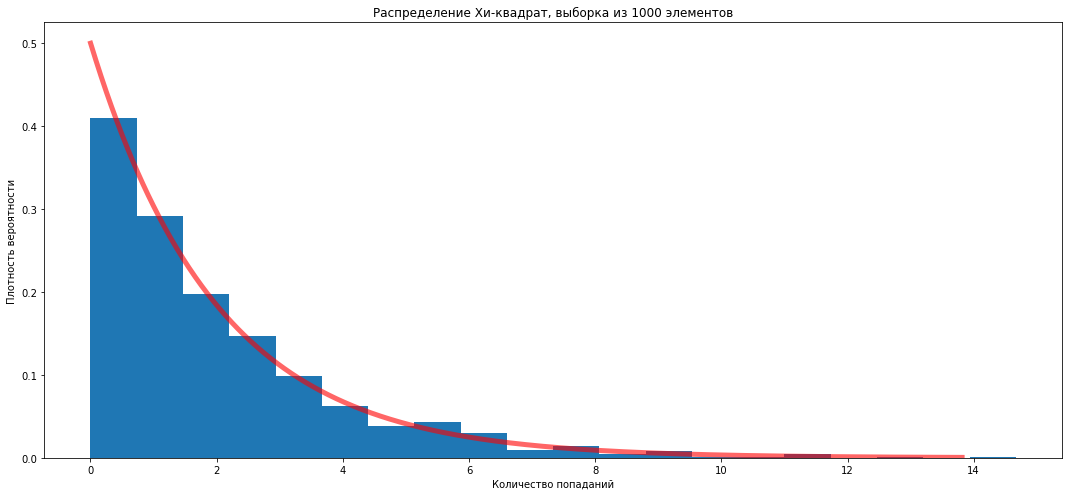

In [7]:
plt.figure(figsize=(15, 7))
x = np.linspace(distribution.ppf(0.001),
                distribution.ppf(0.999), 1000)

plt.hist(sample, normed=True, bins=20)
plt.title('Распределение Хи-квадрат, выборка из 1000 элементов')
plt.xlabel('Количество попаданий')
plt.ylabel('Плотность вероятности')
plt.plot(x, distribution.pdf(x),
       'r-', lw=5, alpha=0.6)
plt.tight_layout()
plt.show()

Создадим двойной цикл для формирования выборок средних и построим их

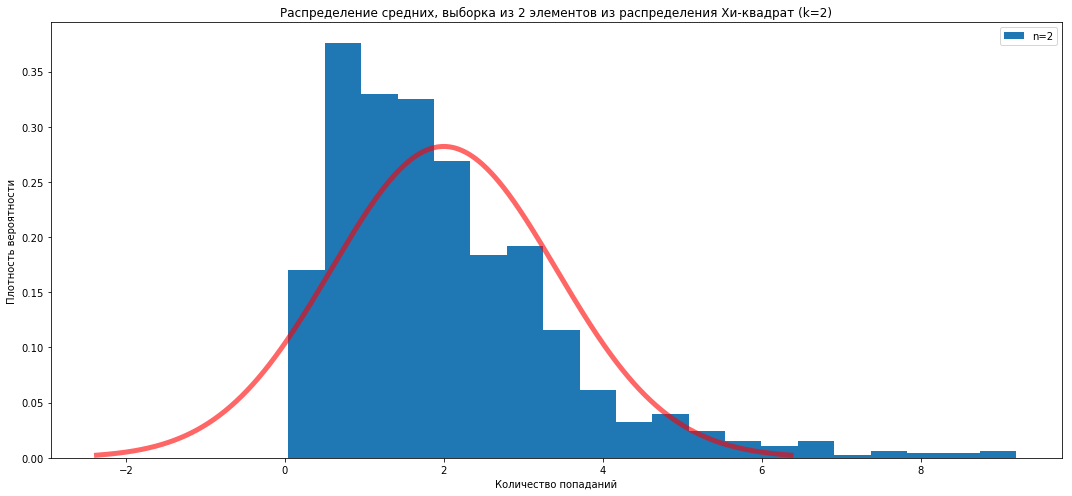

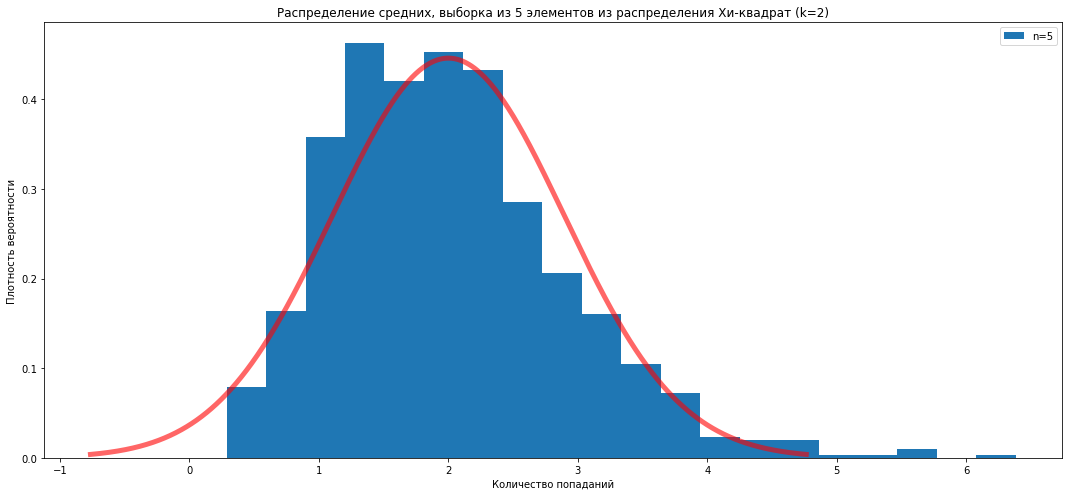

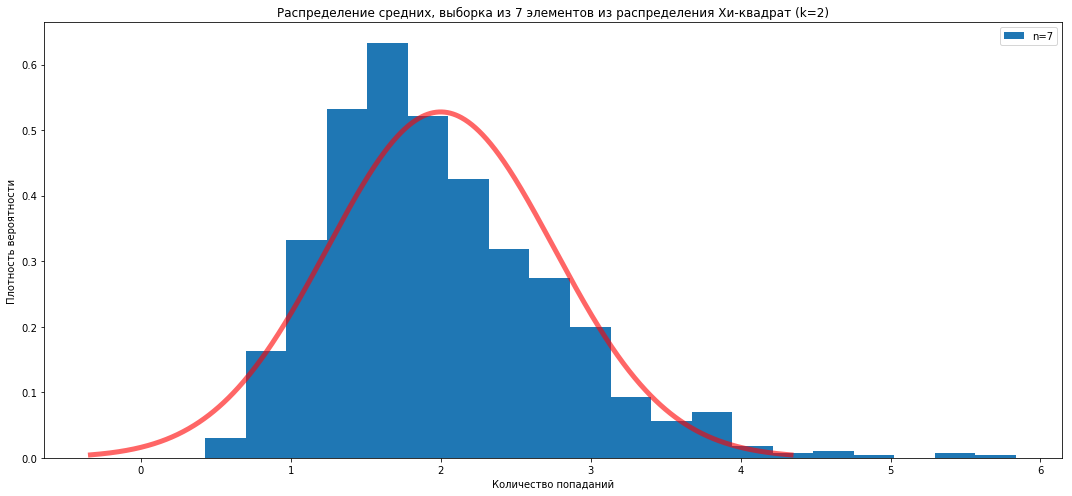

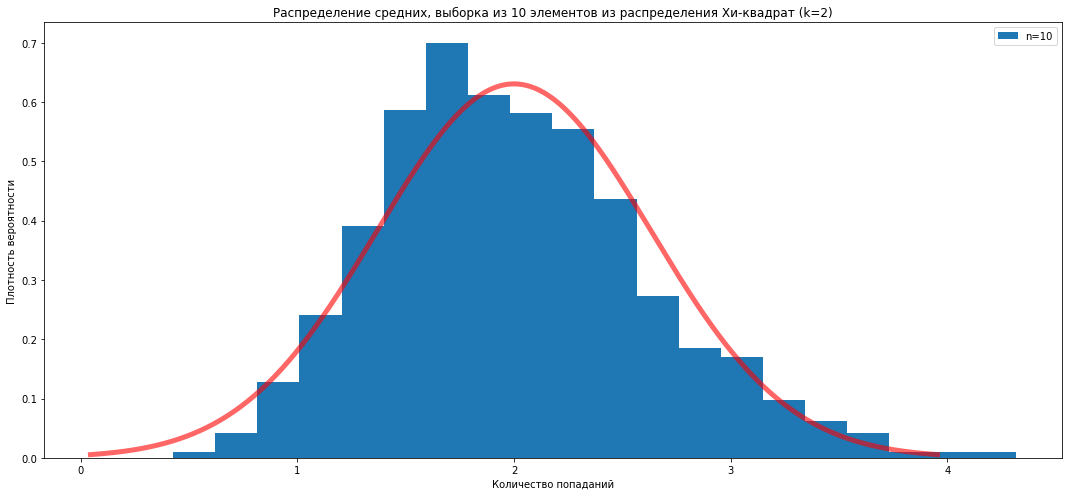

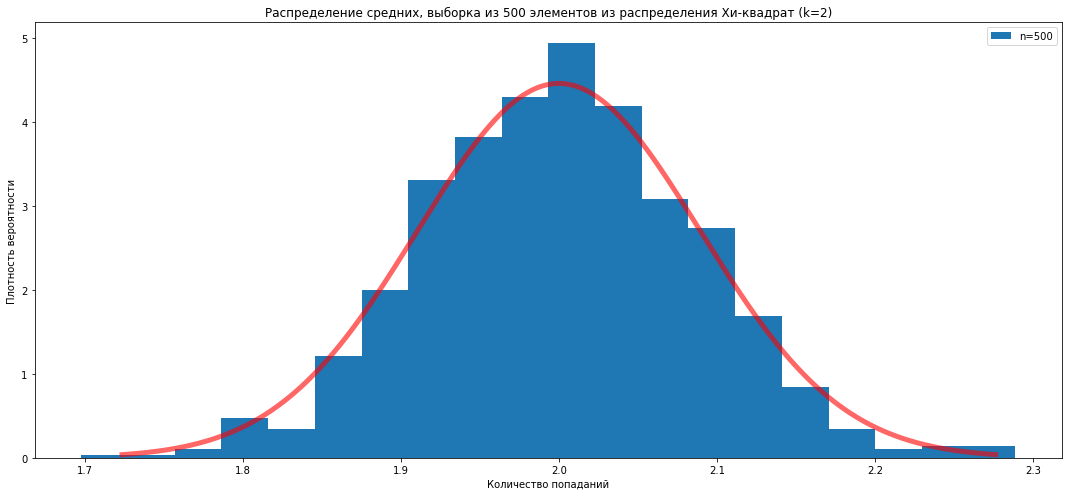

In [8]:
for n in [2, 5, 7, 10, 500]:
    means = []
    for _ in range(1000): # размеры выборки
        sample = distribution.rvs(n)
        means.append(sample.mean())
        
    plt.figure(figsize=(15, 7))
    plt.hist(means, normed=True, bins=20, label=f'n={n}')
    
    theor_mean = k # матожидание из википедии
    theor_std = np.sqrt(2 * k / n) # корень из дисперсии, из википедии
    theoretical_norm_dist = st.norm(theor_mean, theor_std)
    x = np.linspace(theoretical_norm_dist.ppf(0.001),
                theoretical_norm_dist.ppf(0.999), 1000)
    plt.plot(x, theoretical_norm_dist.pdf(x),
       'r-', lw=5, alpha=0.6)
    plt.title(f'Распределение средних, выборка из {n} элементов из распределения Хи-квадрат (k={k})')
    plt.xlabel('Количество попаданий')
    plt.ylabel('Плотность вероятности')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

## Можно наблюдать, что с ростом n распределение средних лучше приближается к нормальному